In [1]:
import pandas as pd 
import numpy as np 
tnc= pd.read_table("C:\\Users\\melek\\Downloads\\titanic-passengers.csv", delimiter =";"  )


In [50]:
tnc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,S,1,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,S,1,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,S,1,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,S,1,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,S,1,1


In [3]:
tnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
tnc.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [5]:
tnc.isnull().sum().sum()

866

In [6]:
tnc['Age'].fillna(tnc['Age'].mean(), inplace=True) 


In [7]:
tnc.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
tnc['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
E49            1
A16            1
C70            1
F38            1
C111           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
tnc=tnc.drop(labels = ["Cabin"], axis=1)

In [10]:
tnc['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:

tnc['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
tnc['Embarked'].fillna('S', inplace=True)

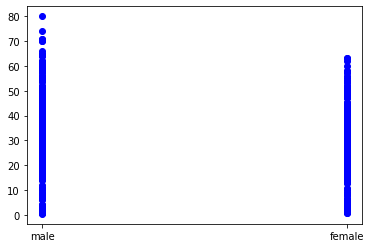

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(tnc['Sex'],tnc['Age'],'bo')
plt.show()


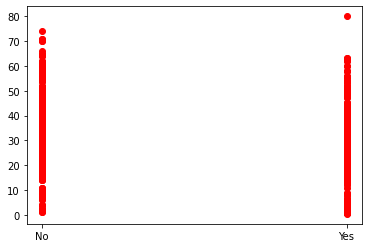

In [14]:
plt.plot(tnc['Survived'],tnc['Age'],'ro')
plt.show()


In [15]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [16]:
dict= {"Survived" : {"Yes" : 1 , "No" : 0}}
tnc.replace(dict, inplace = True)


In [17]:
dict= {"Sex" : {"male" : 1 , "female" : 0}}
tnc.replace(dict, inplace = True)

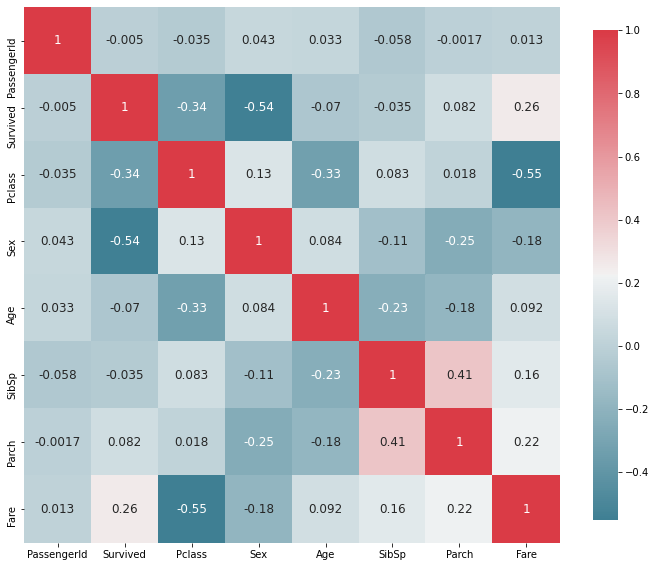

In [18]:
plot_correlation_map( tnc )

In [19]:
#the funciton show us the correlation between  two diffrent features in the dataframe meaning the closer it is 
# to 1 the  more they depend on each other the closer it is from 0 the further (negative meaning opposite correlation)


In [20]:
tnc[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
tnc['Title'] = tnc['Name'].str.extract("([A-Za-z]+)\.")

<AxesSubplot:title={'center':'Number of survivors'}, xlabel='Survived', ylabel='Number'>

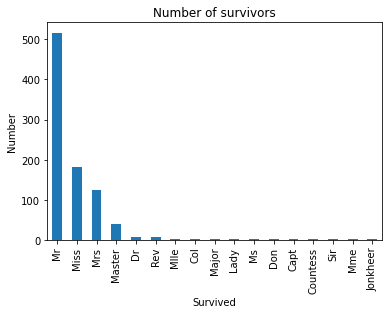

In [22]:
plt.xlabel("Survived")
plt.ylabel("Number")
plt.title("Number of survivors")
vc=tnc['Title'].value_counts()
vc.plot.bar(rot=90)

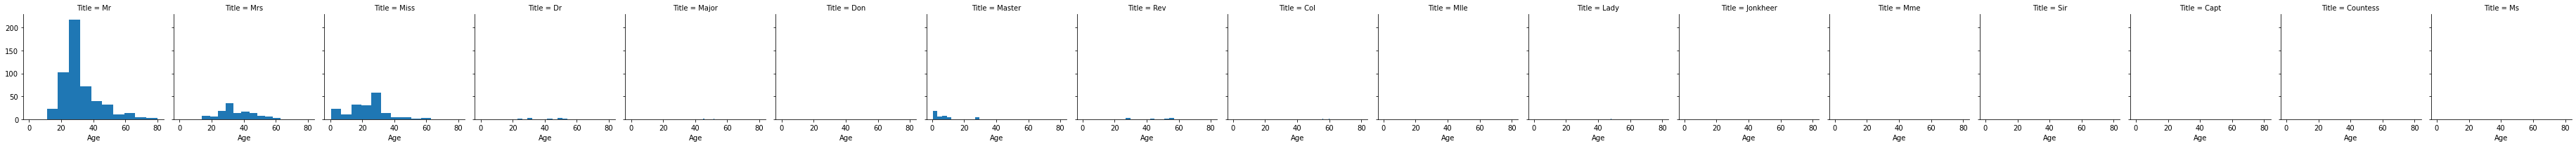

In [23]:
a=sns.FacetGrid(tnc, col="Title")
a.map(plt.hist ,'Age')

In [24]:
tnc["Title"].replace({
"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",
"Dr":       "Officer",
 "Rev":     "Officer",
 "Jonkheer":   "Royalty",
 "Don":        "Royalty",
"Sir" :       "Royalty",
"Lady" :      "Royalty",
"Countess": "Royalty",
"Dona":       "Royalty",
"Mme":        "Miss",
"Mlle":       "Miss",
"Miss" :      "Miss",
"Ms":         "Mrs",
"Mr" :        "Mrs",
"Mrs" :       "Mrs",
"Master" :    "Master" },inplace=True)

In [25]:
tnc["familysize"]=tnc['Parch']+tnc['SibSp']

In [26]:
#isuless

In [27]:
dict= {"Title" : {"Mrs" : 1 , "Miss" : 2 , "Officer" : 3 , "Royalty" : 4 , "Master" : 5 }}
tnc.replace(dict, inplace = True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [29]:
X = tnc[['Age','Sex','Title']]
y = tnc['Survived']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

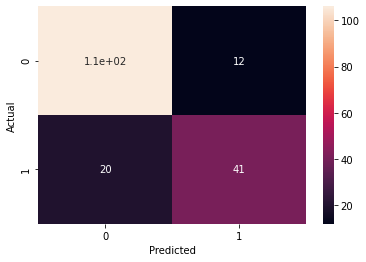

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       118
           1       0.77      0.67      0.72        61

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.82      0.82      0.82       179



<AxesSubplot:xlabel='Title', ylabel='Survived'>

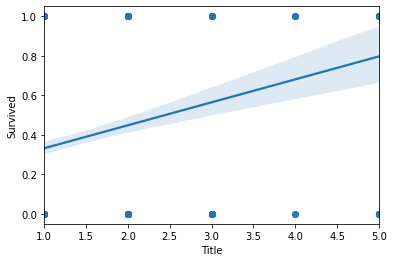

In [34]:
sns.regplot(x='Title',y='Survived',data=tnc)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [47]:
x=tnc.drop(["Survived", "Name", "Ticket", "Embarked"], axis=1)
y= tnc["Survived"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


In [49]:
treee = DecisionTreeClassifier(criterion = "gini", splitter='random', max_leaf_nodes = 10, min_samples_leaf=5, max_depth=5)  
treee.fit(x_train, y_train)  
y_pred=treee.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8324022346368715


[Text(657.6428571428571, 996.6, 'Sex <= 0.534\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(239.14285714285714, 815.4000000000001, 'Pclass <= 2.591\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(119.57142857142857, 634.2, 'gini = 0.1\nsamples = 18.7%\nvalue = [0.053, 0.947]'),
 Text(358.7142857142857, 634.2, 'Age <= 34.455\ngini = 0.5\nsamples = 16.7%\nvalue = [0.504, 0.496]'),
 Text(239.14285714285714, 453.0, 'familysize <= 3.799\ngini = 0.498\nsamples = 14.7%\nvalue = [0.467, 0.533]'),
 Text(119.57142857142857, 271.79999999999995, 'gini = 0.477\nsamples = 12.5%\nvalue = [0.393, 0.607]'),
 Text(358.7142857142857, 271.79999999999995, 'gini = 0.219\nsamples = 2.2%\nvalue = [0.875, 0.125]'),
 Text(478.2857142857143, 453.0, 'gini = 0.337\nsamples = 2.0%\nvalue = [0.786, 0.214]'),
 Text(1076.142857142857, 815.4000000000001, 'Pclass <= 1.131\ngini = 0.296\nsamples = 64.6%\nvalue = [0.82, 0.18]'),
 Text(837.0, 634.2, 'PassengerId <= 375.651\ngini = 0.461\ns

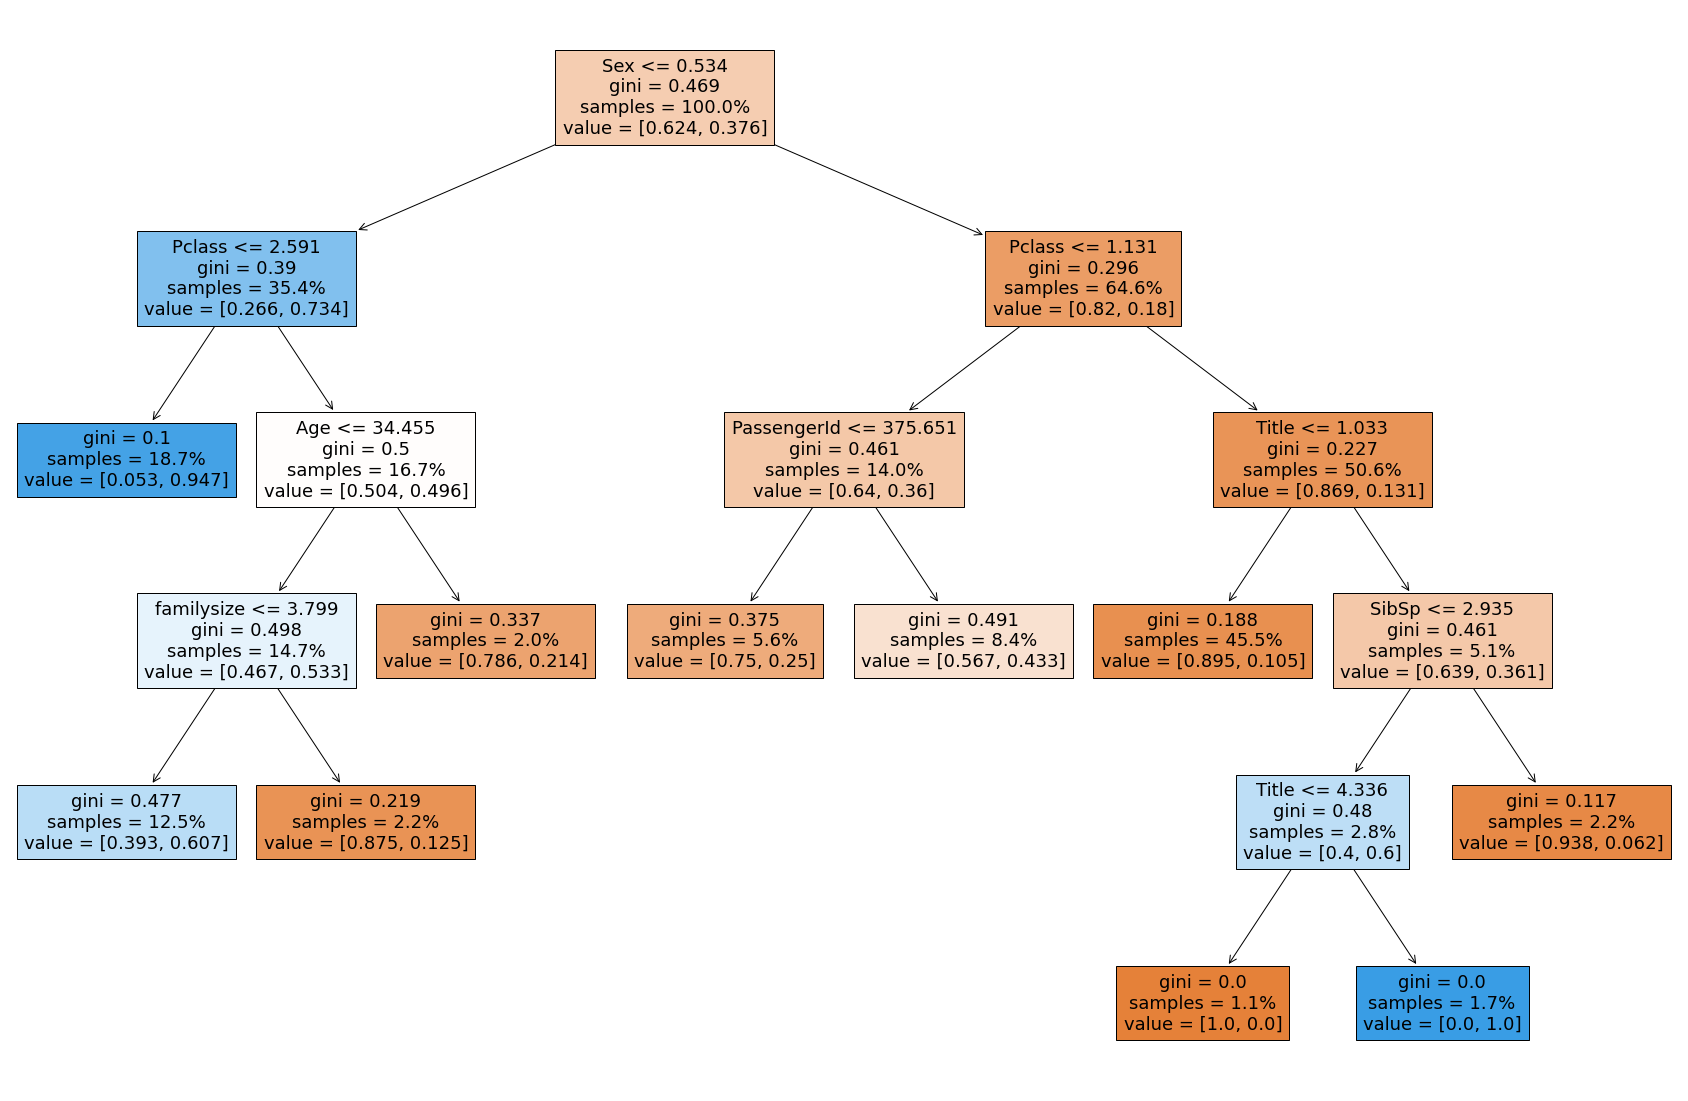

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30,20))
plot_tree(treee, filled = True, feature_names = x.columns, proportion = True)

In [63]:
x=tnc[["Age","Sex","Title","familysize"]]
y= tnc["Survived"]


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [65]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter='random', max_leaf_nodes = 10, min_samples_leaf=5, max_depth=5)  
dtree.fit(x_train, y_train)  
y_pred=dtree.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


### A1>A2

In [66]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 


X=tnc[['Age', 'Sex', 'Title', 'familysize']] 
y=tnc['Survived']  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [67]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7910447761194029


### A1>A2>A3